### Ruth Maina
### 12.2 Exercise

### References:
#### Dataset source: https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking
#### Textbook reference: Think Stats, 2nd Edition, Copyright 2016 Allen B. Downey

## Week 1 & 2 - Milestone 1: Evaluate Datasets, start thinking of statistical questions

### Statistical question: Does smoking increase health risks to the human body? If so, what is the effect of smoking on blood pressure, cholesterol, and any other health indicators?  There are claims that smoking increases cholesterol, so we will perform analysis to explore smokers and non smokers values

In [8]:
#Download some examples from the textbook incase needed

#define download function, download files and perform basic file validation

from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")


In [34]:
#import libraries from the textbook incase needed
import nsfg
import first
import thinkstats2
import thinkplot

In [1]:
#import python libraries needed for data manipulation
import numpy as np
import pandas as pd

## Week 3 - Milestone 2: Select a dataset, solidify your statistical question, begin describing the single variables in your dataset to determine which variables are relevant to your question (Distributions, PMFs, CDFs).  You should know your statistical question you are trying to answer by no later than this week.

## A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).
## Describe what the 5 variables mean in the dataset (Chapter 1).


In [4]:
#load selected smoking data already uploaded into Jupyter from the source
df = pd.read_csv("smoking.csv")

In [3]:
#read top 5 rows of smoking data
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


### Describe the single variables in your dataset to determine which variables are relevant to your question
###### There's a total of 27 variables in the dataset,each row represents health screening results of an individual
###### Below are the chosen variables which i believe are relevant to the statistical question/smoking risk indicators: 
###### 1.ID is the integer identifier of each respondent, will help identify respondents
###### 2.Age is the respondent's age, will help gauge respondent health, younger could be presumed healthier than seniors
###### 3.weight is the respondent's weight in kg, will help gauge if within normal body mass index of 25 
###### 4.For hearing left and right; 1: normal, 2: suspected disease, will help gauge if respondent is healthy 
###### 5.smoking: 1 (does not smoke), 2 (previously smoked but quit), will help gauge if respondent is healthy
###### 6.systolic and relaxation are blood pressure values, normal is 120/80, will help gauge if respondent is healthy
###### 7.fasting blood sugar, 99 or lower is normal, will help gauge if respondent is healthy
###### 8.Cholesterol is total count of healthy and bad cholesterol, normal is 200 and under, will help gauge if respondent is healthy


### Below variables are not chosen for now and a rationale/my reasoning is included below next to each variable name:
###### gender - not an intcannot be calculated
###### height(cm) - not relevant our study is for any smoker irrespective of height 
###### waist(cm) - not chosen to avoid redundancy since weight is already included
###### eyesight - not chosen since unsure of what the many data values represent
###### triglyceride - this is important for blood health but not chosen since there's already too many variables
###### HDL - not chosen to avoid redundancy - included in cholesterol
###### LDL - not chosen to avoid redundancy - included in cholesterol
###### hemoglobin - not chosen since there's already too many variables
###### Urine protein - not chosen since there's already too many variables
###### serum creatinine - unsure of meaning
###### AST - unsure of meaning
###### ALT - unsure of meaning
###### Gtp - unsure of meaning
###### oral - unsure of meaning - all values are Y
###### dental caries - this is important for dental health but not chosen since there's already too many variables
###### tartar - this is important for dental health but not chosen since there's already too many variables
##### Depending on how analysis goes, some of these omitted variables could be scrutinized further

In [5]:
#For further exploration, printing the column names below just to see what i am working with
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

### Some data validation below for the chosen variables - examining data type and count output:

In [14]:
#For data validation, count the number of times for smoking variable count and total count. The output confirms 
#all rows are present and none lost in translation
df.smoking.value_counts(sort=True)

0    35237
1    20455
Name: smoking, dtype: int64

In [16]:
df.ID.value_counts(sort=True)

0        1
46400    1
46387    1
46388    1
46389    1
        ..
23182    1
23183    1
23185    1
23186    1
55691    1
Name: ID, Length: 55692, dtype: int64

In [17]:
df.age.value_counts(sort=True)

40    15181
45     7037
60     6167
50     5549
55     5020
35     4480
30     4056
25     3525
20     1605
65     1336
70      827
75      614
80      280
85       15
Name: age, dtype: int64

In [23]:
df.systolic.value_counts(sort=True)

110.0    3490
120.0    3427
130.0    3273
118.0    2992
124.0    1543
         ... 
192.0       1
213.0       1
208.0       1
189.0       1
196.0       1
Name: systolic, Length: 130, dtype: int64

In [24]:
df.relaxation.value_counts(sort=True)

80.0     5435
70.0     5226
78.0     3183
60.0     2182
72.0     2159
         ... 
126.0       1
42.0        1
129.0       1
124.0       1
119.0       1
Name: relaxation, Length: 95, dtype: int64

In [26]:
df.Cholesterol.value_counts(sort=True)

199.0    696
192.0    664
198.0    654
187.0    650
189.0    639
        ... 
72.0       1
363.0      1
386.0      1
349.0      1
84.0       1
Name: Cholesterol, Length: 286, dtype: int64

In [33]:
#check for missing values in any of the columns, confirmed there is none
df.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [32]:
#check data types to validate chosen variables datatypes under Dtype, some are int while others are floats 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

## Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

## Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

In [41]:
#first import additional libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [59]:
from statistics import mean, median, mode, stdev


### Doing histograms for  key variables  of interest - My variables are ID,age,weight(kg),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,smoking

Text(0, 0.5, 'Frequency')

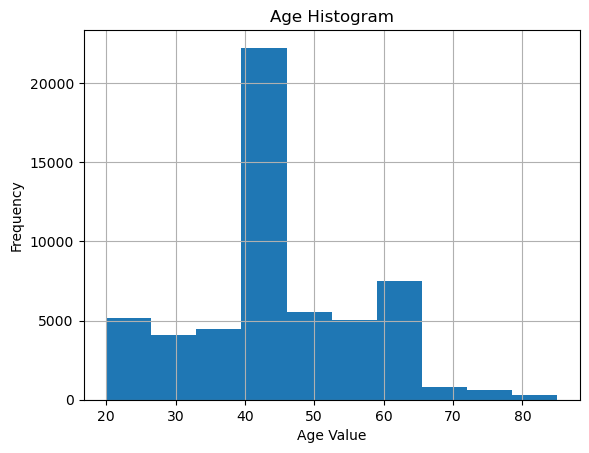

In [42]:
age_plot = df['age'].hist(bins=10)
age_plot.set_title('Age Histogram')
age_plot.set_xlabel('Age Value')
age_plot.set_ylabel('Frequency')

#Age rationale: The distribution for age is somewhat uniform but we find ages ~ 40-46 having the highest frequency/mode
#There are no outliers except that the the later ages of life seem to have lower frequency, this is expected with 
#a potential explanation that most smokers tend to not live longer than ~65 which is where we see the outliers thus
#the age outlier should be left as is and not removed

#Age Mean is ~44 as calculated below 
#Age Mode is around 40-46 range
#Age Spread we see only one spike but the rest of the values are uniformly spread 
#Age Tails drop off with age 65

In [65]:
#Age Mean
age_mean = df.age.mean()
age_mean

44.18291675644617

Text(0, 0.5, 'Frequency')

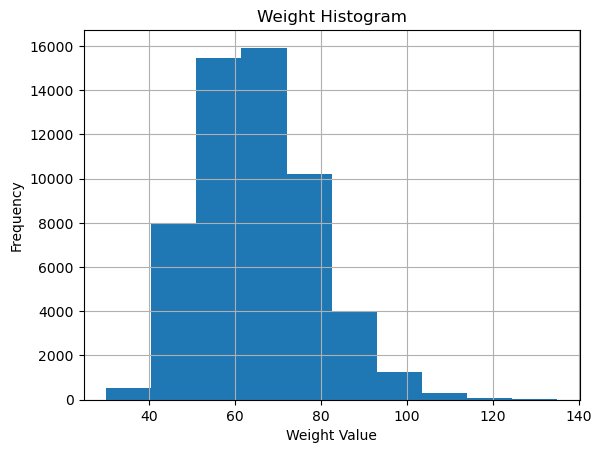

In [43]:
weight_plot = df['weight(kg)'].hist(bins=10)
weight_plot.set_title('Weight Histogram')
weight_plot.set_xlabel('Weight Value')
weight_plot.set_ylabel('Frequency')

#Weight rationale: The distribution for weight is somewhat bell curved/normal but assymetrical in shape and skewed on the right
#There are outliers on the right side of the curve around 110kg/250 pound weights
#The weight outlier should be left as is and not removed since it could be significant to the study - incase health risk
#is due to a factor other than smoking

#Weight Mean is ~66 as calculated below 
#Weight Mode is around 60-70 range
#Weight Spread we see only bell-curve assymetrical spread 
#Weight Tails drop off after 100kg

In [71]:
#Weight Mean
weight_mean = df['weight(kg)'].mean()
weight_mean

65.86493571787689

Text(0, 0.5, 'Frequency')

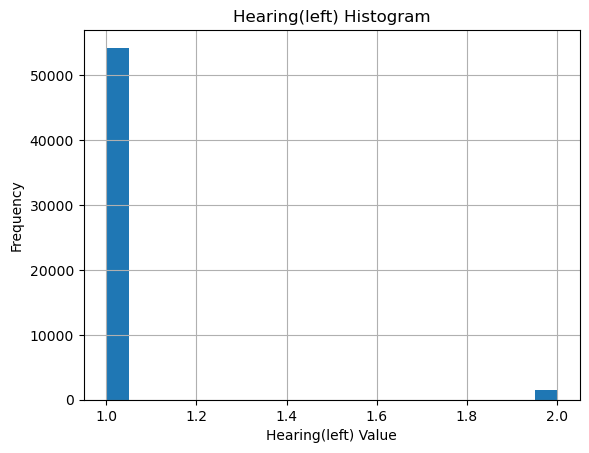

In [45]:
hearingLeft_plot = df['hearing(left)'].hist(bins=20)
hearingLeft_plot.set_title('Hearing(left) Histogram')
hearingLeft_plot.set_xlabel('Hearing(left) Value')
hearingLeft_plot.set_ylabel('Frequency')

#Hearing rationale: The distribution for both hearing (left and right) are very similar, with low abnormal count
#This is good news that most individuals are in the 1 range (normal)
#There are no outliers 

#Mean is N/A for hearing
#Mode and Spread spikes 1 range (normal people)
#Tails - we see abnormal count being much lower than normal

Text(0, 0.5, 'Frequency')

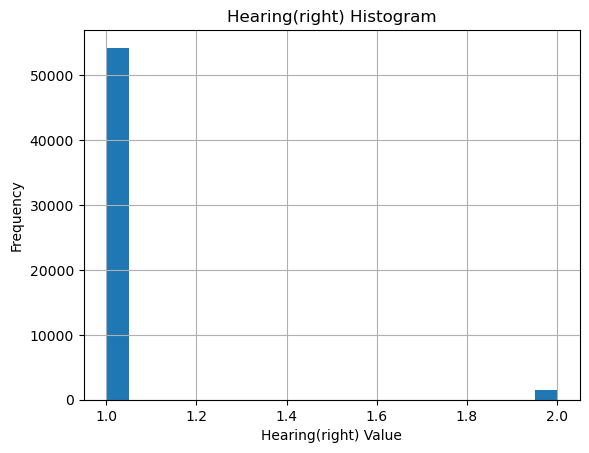

In [46]:
hearingRight_plot = df['hearing(right)'].hist(bins=20)
hearingRight_plot.set_title('Hearing(right) Histogram')
hearingRight_plot.set_xlabel('Hearing(right) Value')
hearingRight_plot.set_ylabel('Frequency')

#Hearing rationale: The distribution for both hearing (left and right) are very similar, with low abnormal count
#This is good news that most individuals are in the 1 range (normal)
#There are no outliers 

#Mean is N/A for hearing
#Mode and Spread spikes 1 range (normal people)
#Tails - we see abnormal count being much lower than normal

Text(0, 0.5, 'Frequency')

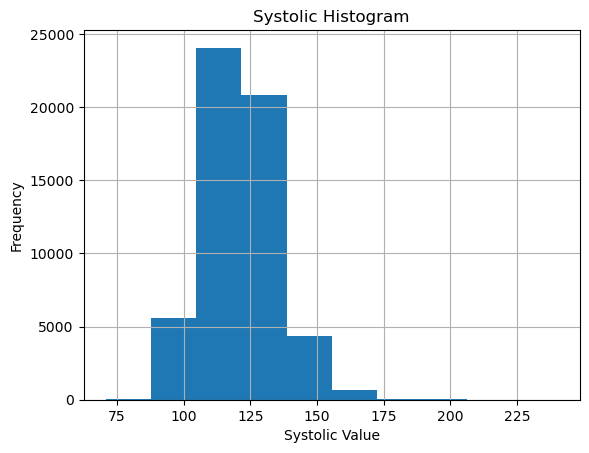

In [52]:
systolic_plot = df['systolic'].hist(bins=10)
systolic_plot.set_title('Systolic Histogram')
systolic_plot.set_xlabel('Systolic Value')
systolic_plot.set_ylabel('Frequency')

#Systolic rationale: The distribution for systolic blood pressure is somewhat bell curved/normal but assymetrical in shape 
# and skewed on the right where there are outliers
#The outlier should be left as is and not removed since it could be significant to the study - to see if smoking
#and systolic along with weight could be studied further

#systolic Mean is ~121 as calculated below 
#systolic Mode is around 100-125 range
#systolic Spread we see only bell-curve assymetrical spread 
#systolic Tails drop off after 150 

In [72]:
#systolic Mean
systolic_mean = df['systolic'].mean()
systolic_mean

121.49421820010055

Text(0, 0.5, 'Frequency')

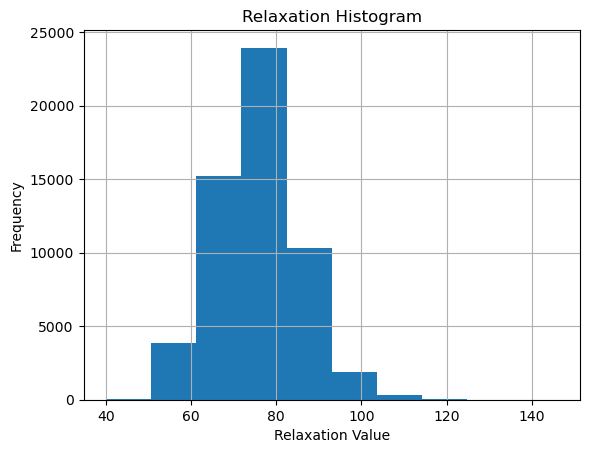

In [53]:
relaxation_plot = df['relaxation'].hist(bins=10)
relaxation_plot.set_title('Relaxation Histogram')
relaxation_plot.set_xlabel('Relaxation Value')
relaxation_plot.set_ylabel('Frequency')

#Relaxation rationale: Similar to systolic pressure, the distribution for relaxation blood pressure is also somewhat bell curved
#normal but assymetrical in shape and also skewed on the right where there are outliers
#The outlier should be left as is and not removed since it could also be significant to the study  

#relaxation Mean is ~76 as calculated below 
#relaxation Mode is around 70-80 range
#relaxation Spread we see only bell-curve assymetrical spread 
#relaxation Tails drop off after 100 

In [73]:
#relaxation Mean
relaxation_mean = df['relaxation'].mean()
relaxation_mean

76.00483013718308

Text(0, 0.5, 'Frequency')

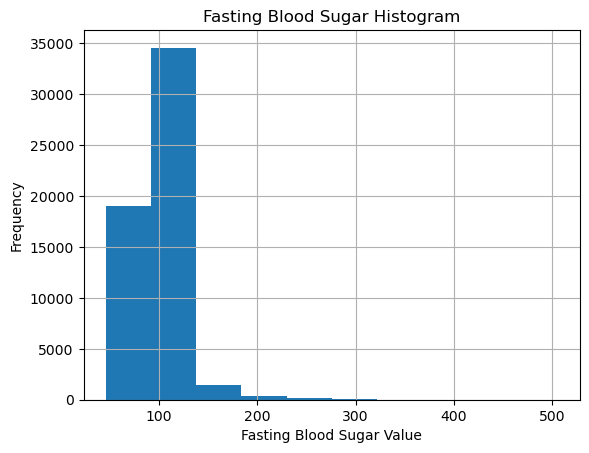

In [54]:
fastingBloodSugar_plot = df['fasting blood sugar'].hist(bins=10)
fastingBloodSugar_plot.set_title('Fasting Blood Sugar Histogram')
fastingBloodSugar_plot.set_xlabel('Fasting Blood Sugar Value')
fastingBloodSugar_plot.set_ylabel('Frequency')

#Fasting Blood Sugar rationale: The distribution is concentrated around 95-115 
#There are outliers from 115 - 310 
#This could be safely be removed since the counts are not that high but i will leave as is

#Blood sugar Mean is ~99 as calculated below 
#Mode is around 95-115 range
#Spread we see non uniform spread 
#Tails / outliers from 115 - 310 

In [74]:
#fasting blood sugar Mean
fbs_mean = df['fasting blood sugar'].mean()
fbs_mean

99.312324929972

Text(0, 0.5, 'Frequency')

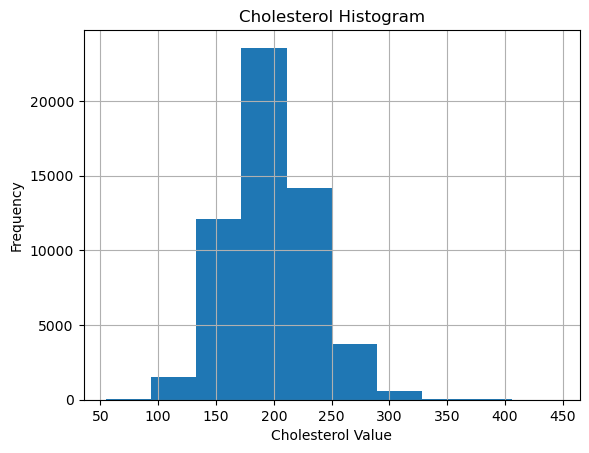

In [55]:
Cholesterol_plot = df['Cholesterol'].hist(bins=10)
Cholesterol_plot.set_title('Cholesterol Histogram')
Cholesterol_plot.set_xlabel('Cholesterol Value')
Cholesterol_plot.set_ylabel('Frequency')

#Cholesterol rationale: Similar to blood pressure and Weight, the distribution for Cholesterol is also somewhat bell curved
#normal but assymetrical in shape and also skewed on the right where there are outliers
#The outlier should be left as is and not removed since it could also be significant to the study 

#BCholesterol Mean is ~197 as calculated below 
#Mode is around 175-220 range
#Spread we see bell-curve uniform spread 
#Tails from 280 

In [75]:
#Cholesterol Mean
Cholesterol_mean = df['Cholesterol'].mean()
Cholesterol_mean

196.90142210730446

Text(0, 0.5, 'Frequency')

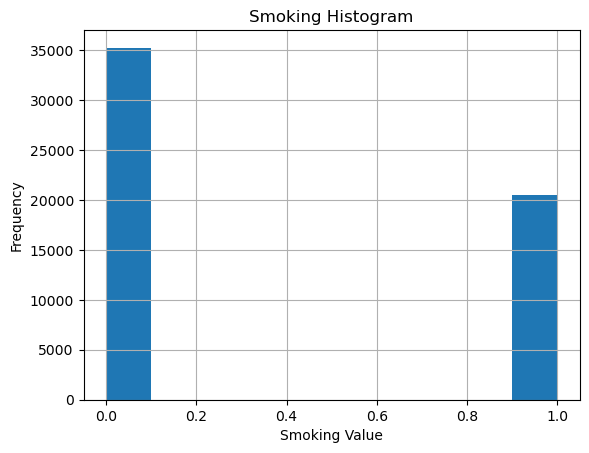

In [56]:
smoking_plot = df['smoking'].hist(bins=10)
smoking_plot.set_title('Smoking Histogram')
smoking_plot.set_xlabel('Smoking Value')
smoking_plot.set_ylabel('Frequency')

#Hearing rationale: The spread/distribution for smoking is Similar to hearing in shape  
#This is good news that most individuals are non smokers around 35000 count, and smokers around 20000 count
#There are no outliers as expected  

#Mean is N/A for smoking since its a binary representation
#Mode and Spread spikes 1 range (normal people)
#Tails - we see abnormal count being much lower than normal

## Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

In [140]:
#For PMF i will compare Cholesterol for smokers and non smokers**

smoker = df[df.smoking == 1]
nonSmoker = df[df.smoking != 1]

In [146]:
#compute the distribution of cholesterol for smoker, nonSmoker
smoker_cholesterol = smoker.Cholesterol
smoker_cholesterol_dropna = smoker.Cholesterol.dropna()
print('Smokers Cholesterol:', len(smoker_cholesterol), len(smoker_cholesterol_dropna))
 
nonSmoker_cholesterol = nonSmoker.Cholesterol
nonSmoker_cholesterol_dropna = nonSmoker_cholesterol.dropna()
print('Non Smokers Cholesterol:', len(nonSmoker_cholesterol), len(nonSmoker_cholesterol_dropna))

smokers_pmf = thinkstats2.Pmf(smoker_cholesterol_dropna, label='smoker')
nonSmokers_pmf = thinkstats2.Pmf(nonSmoker_cholesterol_dropna, label='non smoker')

Smokers Cholesterol: 20455 20455
Non Smokers Cholesterol: 35237 35237


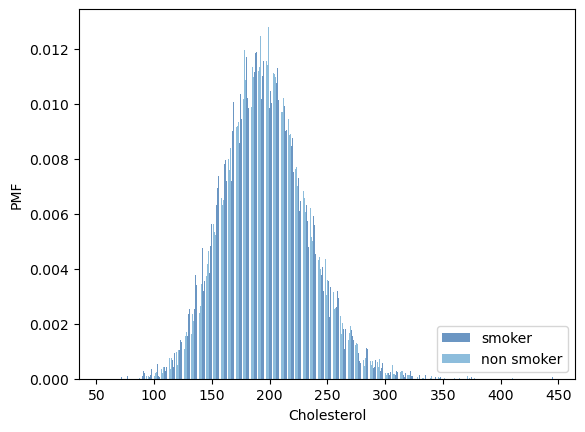

In [154]:
#plot the PMFs of cholesterol for smokers and non smokers. Will change scale  in the next section
width = 0.4 

thinkplot.PrePlot(2)
thinkplot.Hist(smokers_pmf, align='right', width=width)
thinkplot.Hist(nonSmokers_pmf, align='left', width=width)
thinkplot.Config(xlabel='Cholesterol', ylabel='PMF')

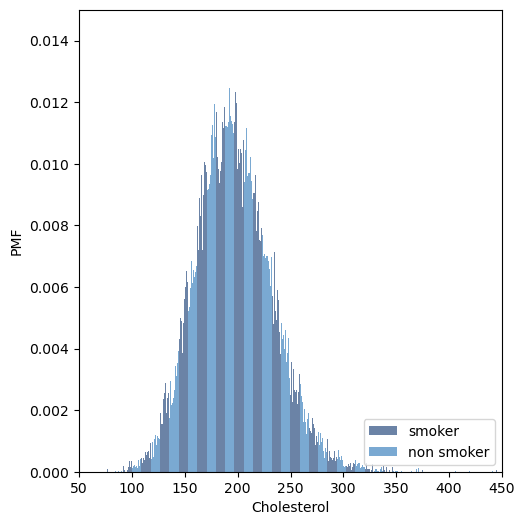

In [153]:
#plot the PMFs of cholesterol for smokers and non smokers - with a different scaling/denser  
width = 0.5
axis = [50, 450, 0, 0.0150]
thinkplot.PrePlot(3, cols=2)
thinkplot.Hist(smokers_pmf, align="right", width=width)
thinkplot.Hist(nonSmokers_pmf, align="left", width=width)
thinkplot.Config(xlabel="Cholesterol", ylabel="PMF", axis=axis)

## Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

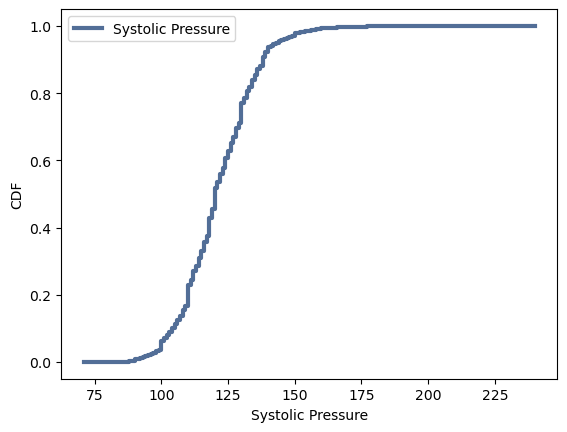

In [123]:
#Below plot shows the distribution of systolic pressure
systolic_cdf = thinkstats2.Pmf(df.systolic, label="systolic")
relaxation_cdf = thinkstats2.Pmf(df.relaxation, label="relaxation")

cdf = thinkstats2.Cdf(df['systolic'], label='Systolic Pressure')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Systolic Pressure', ylabel='CDF', loc='upper left')

## Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

In [124]:
#lognormal distribution using the example from thinkstats    
#Only that instead of using adult weights values from brfss, i am using my smoking dataset weight values 


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/CDBRFS08.ASC.gz")

Downloaded CDBRFS08.ASC.gz


In [127]:
#my df dataframe points to smoking dataset for analysis
#this will inform if rhe smoking values are disparately different from general public
#if different, it could be due to the added smoking component

weights = df['weight(kg)'].dropna()

In [128]:
def MakeNormalModel(weights):
    """Plots a CDF with a Normal model.

    weights: sequence
    """
    cdf = thinkstats2.Cdf(weights, label="weights")

    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = np.sqrt(var)
    print("n, mean, std", len(weights), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label="model", linewidth=4, color="0.8")
    thinkplot.Cdf(cdf)

n, mean, std 55692 65.71427262733602 11.976815181781749


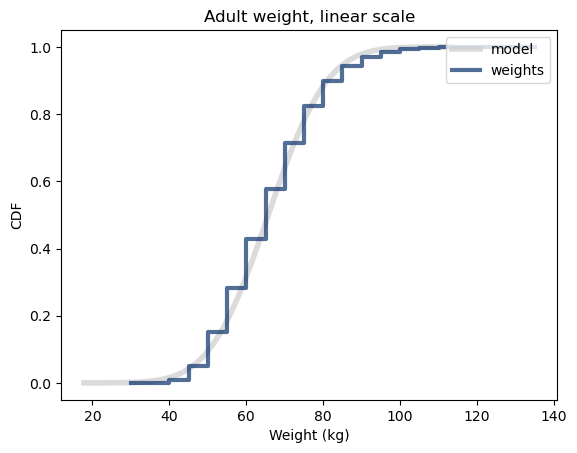

In [129]:
#the distribution of adult weights and a normal model, which is not a very good fit, shape variation 

MakeNormalModel(weights)
thinkplot.Config(
    title="Adult weight, linear scale",
    xlabel="Weight (kg)",
    ylabel="CDF",
    loc="upper right",
)

n, mean, std 55692 1.8104916896628873 0.07897333414420181


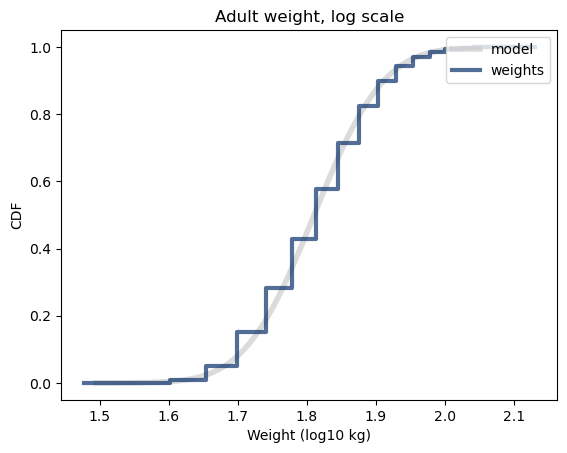

In [130]:
#the distribution of adult weight and a lognormal model, plotted on a log-x scale
log_weights = np.log10(weights)
MakeNormalModel(log_weights)
thinkplot.Config(
    title="Adult weight, log scale",
    xlabel="Weight (log10 kg)",
    ylabel="CDF",
    loc="upper right",
)

In [131]:
#function generates a normal probability plot

def MakeNormalPlot(weights):
    """Generates a normal probability plot of birth weights.

    weights: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color="0.8", label="model")

    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label="weights")

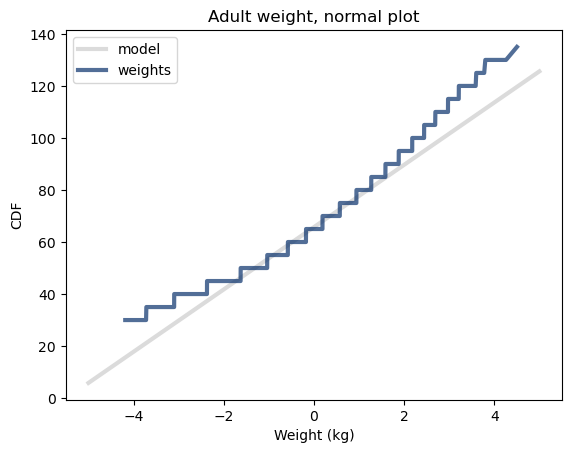

In [132]:
#Here the data also deviates from the model
MakeNormalPlot(weights)
thinkplot.Config(
    title="Adult weight, normal plot",
    xlabel="Weight (kg)",
    ylabel="CDF",
    loc="upper left",
)

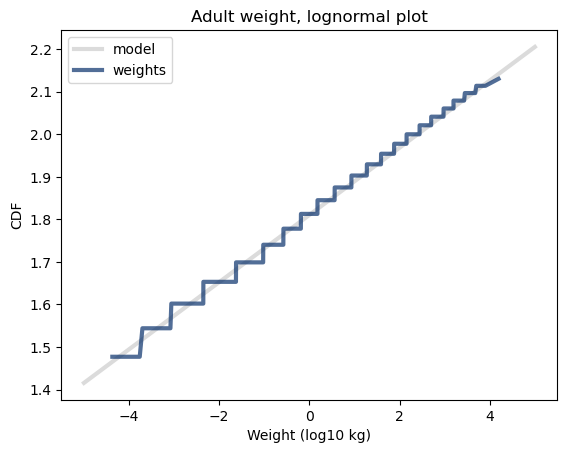

In [133]:
#normal probability plot with log weights, the model DOES NOT fit the data at any point

MakeNormalPlot(log_weights)
thinkplot.Config(
    title="Adult weight, lognormal plot",
    xlabel="Weight (log10 kg)",
    ylabel="CDF",
    loc="upper left",
)

## Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

In [161]:
#I will be comparing weight and cholesterol variables to evaluate the relationship
weights = df['weight(kg)']
cholesterol = df.Cholesterol

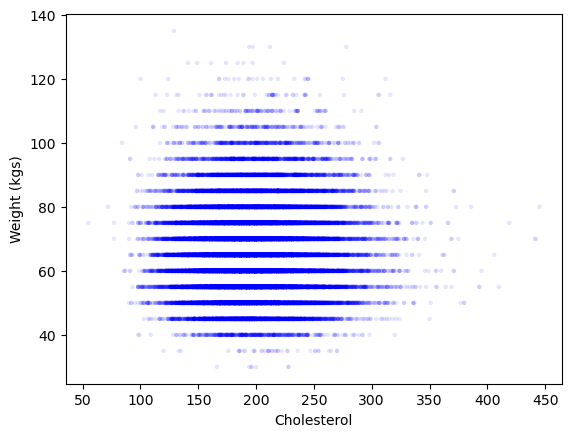

In [251]:
#below is a scatterplot of weight and cholesterol
thinkplot.Scatter(cholesterol, weights, alpha=0.1, s=10)
thinkplot.Config(xlabel='Cholesterol',
                     ylabel='Weight (kgs)')


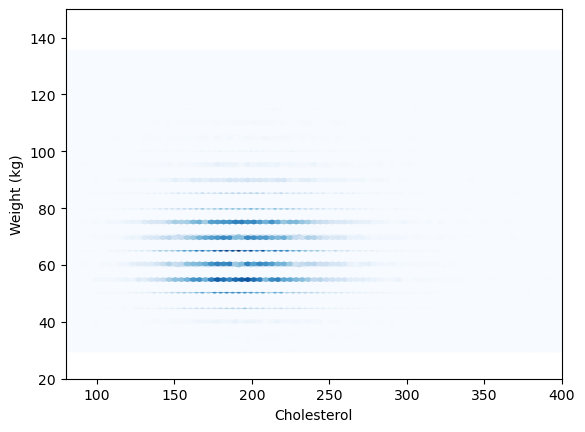

In [181]:
#below is a hexbin of weight and cholesterol
thinkplot.HexBin(cholesterol, weights)
thinkplot.Config(xlabel='Cholesterol',
                 ylabel='Weight (kg)',
                 axis=[80, 400, 20, 150],
                 legend=False)

In [182]:
#Correlation
#using the function definition from thinkstats 
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov


In [184]:
Cov(cholesterol, weights)

12.286477359246293

In [185]:
#The coefficient of correlation
#using the function definition from thinkstats
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [186]:
Corr(cholesterol, weights)

0.02640309376120842

In [189]:
#using the function definition from thinkstats

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [190]:
#Compute Pearson’s and Spearman’s correlations

print('Corr', Corr(cholesterol, weights))
print('SpearmanCorr', SpearmanCorr(cholesterol, weights))


Corr 0.02640309376120842
SpearmanCorr 0.02748619481374177


In [ ]:
#The correlation of cholesterol and weight is about 0.02 which is a moderately strong relationship

#How would you characterize the relationship between these variables?

#Corr 0.026 and SpearmanCorr 0.027 values are so close indicate little to no influence from outliers and a linear relationship
#A Spearman’s and Pearson’s positive correlation values indicate an increasing trend between weight and cholesterol in that
#both increase in the same direction, which is true because as weight increases, cholesterol levels do increase
#Since the values are between 0 and 0.3, its indicative of weak strength and positive direction of a linear relationship  
#also means the effect size/meaningfulness of the relationship is small
#The scatterplot does not indicate a specific distribution thus we cannot deduce anything from it

## Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [192]:
#Using below version of thinkstats2.HypothesisTest with just the essential methods:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [193]:
#Using below code from thinkstats2 compute the p-value of an observed difference in means:

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [194]:
#going back to testing variables against smokers and non smokers to see the effect
data = smoker.Cholesterol.values, nonSmoker.Cholesterol.values

In [195]:
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

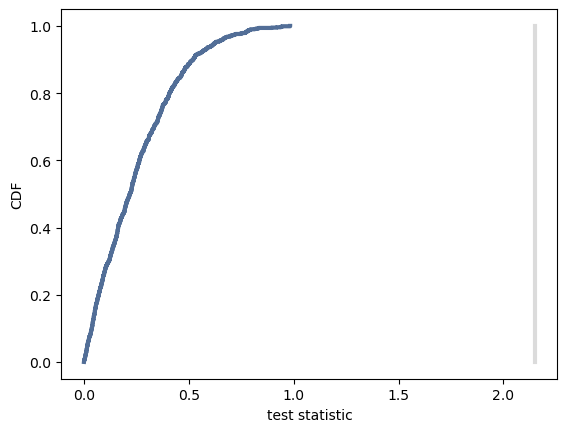

In [197]:
#Above result is not statistically significant
#Plotting below following thinkstats example
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

In [198]:
#checking null hypothesis to explore what can be seen there
class DiffMeansOneSided(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        return test_stat

In [199]:
ht = DiffMeansOneSided(data)
pvalue = ht.PValue()
pvalue

1.0

In [200]:
#Above p value of 1 could mean no change observed thus supporting the null hypothesis of no change between smokers and others

#Difference in standard deviation

class DiffStdPermute(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.std() - group2.std()
        return test_stat

In [201]:
ht = DiffStdPermute(data)
pvalue = ht.PValue()
pvalue

0.185

In [212]:
#above value indicates slight significance

#Power - below estimates the probability of a non-significant p-value

def FalseNegRate(data, num_runs=1000):
    """Computes the chance of a false negative based on resampling.

    data: pair of sequences
    num_runs: how many experiments to simulate

    returns: float false negative rate
    """
    group1, group2 = data
    count = 0

    for i in range(num_runs):
        sample1 = thinkstats2.Resample(group1)
        sample2 = thinkstats2.Resample(group2)
        ht = DiffMeansPermute((sample1, sample2))
        p_value = ht.PValue(iters=101)
        if p_value > 0.05:
            count += 1

    return count / num_runs

In [213]:
neg_rate = FalseNegRate(data)
neg_rate

0.0

In [ ]:
#above is still not significant even though we know there's a chance. This concludes the test

## For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [228]:
#select the needed independent variables x
x = df.iloc[:,10:14]
x

,systolic,relaxation,fasting blood sugar,Cholesterol
0,114.0,73.0,94.0,215.0
1,119.0,70.0,130.0,192.0
2,138.0,86.0,89.0,242.0
3,100.0,60.0,96.0,322.0
4,120.0,74.0,80.0,184.0
...,...,...,...,...
55687,110.0,68.0,89.0,213.0
55688,101.0,62.0,89.0,166.0
55689,117.0,72.0,88.0,158.0
55690,133.0,76.0,107.0,210.0


In [229]:
#select the needed dependent variable y we want to predict = smoking
y = df.iloc[:,26]
y

0        0
1        0
2        1
3        0
4        0
        ..
55687    0
55688    0
55689    0
55690    0
55691    1
Name: smoking, Length: 55692, dtype: int64

In [230]:
#split the dataset in training and test sets using sklearn
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(x,y,test_size=0.3, random_state = 0)

In [231]:
#import linear regression from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [236]:
#viewing a few output for the chosen variables systolic	relaxation	fasting blood sugar	Cholesterol
coefficient = lin_reg.coef_
coefficient

array([-0.00111195,  0.00617889,  0.00201686, -0.00051125])

In [237]:
intercept = lin_reg.intercept_
intercept

-0.06489554014148363

In [238]:
y_prediction = lin_reg.predict(X_test)
y_prediction

array([0.32477716, 0.37211165, 0.35318593, ..., 0.30604928, 0.35329464,
       0.32951472])

In [247]:
#check how good the model is
from sklearn.metrics import r2_score
r2_score(y_test, y_prediction)

0.021060672928287283

In [248]:
#the resulting value 2 percent is not that great could be indictive of a bad model or variables not statistically significant

## A 250-500-word paper summarizing the following: Statistical/Hypothetical Question
## Outcome of your EDA
## What do you feel was missed during the analysis?
## Were there any variables you felt could have helped in the analysis?
## Were there any assumptions made you felt were incorrect?
## What challenges did you face, what did you not fully understand?


##### Statistical question: Does smoking increase health risks to the human body? If so, what is the effect of smoking on blood pressure, cholesterol, and any other health indicators? There are claims that smoking increases cholesterol, so I performed analysis to explore smokers and non-smokers’ values for key health indicators. 

##### I combined some of the textbook samples to perform EDA on the dataset, which worked pretty good since both we’re health related, and thus there was similarity which allowed me to re-use the code. At first, I had many variables in mind but ended up performing a regression of a few. I was surprised to not see much of a causation relationship and statistical significance with some of the variables I thought would be very important such as Cholesterol, Blood Pressure, Weight, and so on. I believe there are other variables I could have explored to help, such as Height, Waist Circumference, and so on. 

##### I don’t believe I missed anything in the analysis. The data is good and there’s potential solutions out there to the same problem, which I look forward to reviewing to see how others approached the problem. This was a great learning experience, and I can’t wait to review some of the results out there in Kaggle for this dataset especially. 

##### I approached the problem knowing there would be strong statistical significance between the variables I chose, this was an incorrect assumption as the analysis showed otherwise. The challenge with the experiment was just getting some of the textbook code to work for the dataset. I had to find alternate ways of accomplishing the task, which isn’t a bad thing. 
